In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
fighters = pd.read_csv('datasets_255092_536001_raw_fighter_details.csv')

In [3]:
fighters.columns

Index(['fighter_name', 'Height', 'Weight', 'Reach', 'Stance', 'DOB'], dtype='object')

In [4]:
fighters.shape

(3313, 6)

In [5]:
from cleanser import RawFightsCleanser

In [6]:
cleanser = RawFightsCleanser()

In [7]:
fighters = cleanser.cleanse_column_names(fighters)

In [8]:
fighters.columns

Index(['fighter_name', 'height', 'weight', 'reach', 'stance', 'dob'], dtype='object')

In [9]:
fighters.head()

,fighter_name,height,weight,reach,stance,dob
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [10]:
fighters.dob.value_counts()

Aug 08, 1988    4
Sep 12, 1984    3
Aug 30, 1979    3
Jun 29, 1981    3
May 09, 1983    3
               ..
Jan 15, 1981    1
Jul 25, 1988    1
Sep 08, 1987    1
Oct 04, 1982    1
Aug 04, 1963    1
Name: dob, Length: 2217, dtype: int64

In [11]:
fighters.stance.value_counts()

Orthodox       1913
Southpaw        431
Switch           85
Open Stance       7
Sideways          3
Name: stance, dtype: int64

In [12]:
fighters.stance.value_counts() / fighters.stance.value_counts().sum()

Orthodox       0.784338
Southpaw       0.176712
Switch         0.034850
Open Stance    0.002870
Sideways       0.001230
Name: stance, dtype: float64

In [13]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   height        3050 non-null   object
 2   weight        3238 non-null   object
 3   reach         1569 non-null   object
 4   stance        2439 non-null   object
 5   dob           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


In [14]:
fighters.dob.describe()

count             2573
unique            2217
top       Aug 08, 1988
freq                 4
Name: dob, dtype: object

In [15]:
fighters.head(10)

,fighter_name,height,weight,reach,stance,dob
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN
5,Aaron Brink,"6' 3""",205 lbs.,NaN,Orthodox,"Nov 12, 1974"
6,Aaron Ely,"5' 8""",135 lbs.,NaN,NaN,"Mar 18, 1989"
7,Aaron Jeffery,"6' 2""",185 lbs.,NaN,NaN,"Nov 14, 1992"
8,Aaron Lanfranco,NaN,155 lbs.,NaN,NaN,"Aug 26, 1986"
9,Aaron Miller,"5' 9""",145 lbs.,NaN,NaN,NaN


In [16]:
pd.isnull(fighters.iloc[0].dob)

True

In [17]:
type(fighters.loc[5].dob)

str

In [18]:
fights = cleanser.load_and_cleanse('raw_total_fight_data.csv', sep=';')

In [19]:
type(fights.iloc[0].date)

str

In [20]:
fights.date.dtype

dtype('O')

In [21]:
fights.date.value_counts()

November 19, 2016     25
October 04, 2014      23
May 31, 2014          22
August 23, 2014       21
June 28, 2014         21
                      ..
September 20, 1996     6
October 16, 1998       6
June 09, 2000          6
September 09, 1994     6
March 13, 1998         6
Name: date, Length: 476, dtype: int64

In [22]:
fights.date.isnull().sum()

0

In [23]:
fighters.dob.isnull().sum()

740

In [24]:
fighters.dob.isnull().sum() / fighters.shape[0]

0.2233625113190462

In [25]:
# So looks like all the fights have dates.  But ~22% of the fighters have a blank date of birth.
# So we can get an age for the fighters in many but not all of the cases.  I don't know what percent, because we don't yet know if the ones without their birthdays listed are in many fights or few fights.

In [26]:
# From the exploratory page for fights, all_fighters = set(fights.r_fighter).union(set(fights.b_fighter))
# change the name a little for clarity
actual_fighters = set(fights.r_fighter).union(set(fights.b_fighter))

In [27]:
len(actual_fighters)

1915

In [28]:
# So there are a lot more people in the fighters data set than in the fights data set.  Weird.
# I wonder if there are any in fights who were not in fighters.

In [29]:
actual_fighters.difference(fighters.fighter_name)

{'Kennedy Nzechukwu'}

In [30]:
def get_fights_for_fighter(fighter_name, fights_df = fights):
    return fights_df[(fights_df.r_fighter == fighter_name) | (fights_df.b_fighter == fighter_name)]

In [31]:
get_fights_for_fighter('Kennedy Nzechukwu')

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_att,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner
103,Kennedy Nzechukwu,Paul Craig,0,0,40 of 72,25 of 77,55,32,47 of 80,31 of 83,...,0,22,0,0.758621,0.0,75,0,22,Kennedy Nzechukwu,b


In [32]:
# So there is one guy, Kennedy Nzechukwu, who had one fight, who is in the fights data set but not in the fighters data set.
# Next see if the people who are in both have a listed birthday.
# Two approaches.
# 1.  Find a set of people from fighters who are in fights, and look at the birthday value
# 2.  Join the pandas data set.
# I think I'll do both, to make sure I know how to do it both ways and for error checking.
# for joining, you have to do it twice because fights has two fighters, a red and a blue

In [33]:
'Marlon Moraes' in set(fighters.fighter_name)

True

In [34]:
fighters[fighters.fighter_name == 'Marlon Moraes']

,fighter_name,height,weight,reach,stance,dob
2154,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [35]:
no_dob = []
for person in actual_fighters:
    #print(person)
    if person not in set(fighters.fighter_name):
        print(person, ' is not there')
    else:
        #print(fighters[fighters.fighter_name == person])
        dob = fighters[fighters.fighter_name == person].iloc[0].dob
        #print(dob)
        if pd.isnull(dob) or dob == '':
            #print(person, 'has no dob')
            no_dob.append(person)
        else:
            pass
            # print(fighters[fighters.fighter_name == person].dob)
print(len(no_dob))

Kennedy Nzechukwu  is not there
139


In [36]:
print(len(set(no_dob)))

139


In [37]:
r_combined = pd.merge(fights, fighters, left_on='r_fighter', right_on='fighter_name')

In [38]:
r_combined

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_pct,ground_diff,loser,r_b_winner,fighter_name,height,weight,reach,stance,dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,100,25,Marlon Moraes,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
1,Henry Cejudo,TJ Dillashaw,1,0,18 of 23,1 of 3,78,33,18 of 23,1 of 3,...,0,15,TJ Dillashaw,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
2,Henry Cejudo,Sergio Pettis,0,0,36 of 83,25 of 98,43,25,85 of 148,38 of 112,...,25,16,Sergio Pettis,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
3,Henry Cejudo,Wilson Reis,1,0,34 of 58,5 of 25,58,20,39 of 64,5 of 25,...,0,8,Wilson Reis,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
4,Henry Cejudo,Chico Camus,0,0,62 of 143,48 of 144,43,33,133 of 219,59 of 157,...,100,-1,Chico Camus,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,Frank Hamaker,Thaddeus Luster,0,0,2 of 3,0 of 0,66,0,14 of 15,0 of 0,...,0,1,Thaddeus Luster,r,Frank Hamaker,NaN,NaN,NaN,NaN,NaN
5139,Scott Morris,Sean Daugherty,0,0,1 of 1,0 of 4,100,0,2 of 2,1 of 5,...,0,0,Sean Daugherty,r,Scott Morris,"5' 10""",210 lbs.,NaN,Orthodox,NaN
5140,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64,0,11 of 17,0 of 3,...,0,6,Kevin Rosier,r,Gerard Gordeau,"6' 5""",216 lbs.,NaN,Orthodox,"Mar 30, 1959"
5141,Gerard Gordeau,Teila Tuli,0,0,3 of 5,0 of 1,60,0,3 of 5,0 of 1,...,0,2,Teila Tuli,r,Gerard Gordeau,"6' 5""",216 lbs.,NaN,Orthodox,"Mar 30, 1959"


In [39]:
b_combined = pd.merge(fights, fighters, left_on='b_fighter', right_on='fighter_name')

In [40]:
b_combined

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_pct,ground_diff,loser,r_b_winner,fighter_name,height,weight,reach,stance,dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,100,25,Marlon Moraes,r,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,60,-3,Raphael Assuncao,b,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,83,-5,Jimmie Rivera,b,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,0,1,John Dodson,b,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,0,0,Marlon Moraes,r,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Royce Gracie,Gerard Gordeau,0,0,1 of 2,0 of 0,50,0,3 of 4,0 of 0,...,0,1,Gerard Gordeau,r,Gerard Gordeau,"6' 5""",216 lbs.,NaN,Orthodox,"Mar 30, 1959"
5140,Jason DeLucia,Trent Jenkins,0,0,3 of 9,1 of 7,33,14,3 of 9,1 of 7,...,0,0,Trent Jenkins,r,Trent Jenkins,"6' 2""",185 lbs.,NaN,NaN,NaN
5141,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64,0,11 of 17,0 of 3,...,0,6,Kevin Rosier,r,Kevin Rosier,"6' 4""",275 lbs.,NaN,Orthodox,NaN
5142,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0,0,4 of 7,0 of 0,...,0,0,Art Jimmerson,r,Art Jimmerson,"6' 1""",196 lbs.,NaN,Orthodox,"Aug 04, 1963"


In [41]:
r_combined.dob.isnull().sum()

63

In [42]:
b_combined.dob.isnull().sum()

172

In [43]:
len(r_combined[r_combined.dob.isnull()].fighter_name.unique())

41

In [44]:
len(b_combined[b_combined.dob.isnull()].fighter_name.unique())

124

In [45]:
r = r_combined[r_combined.dob.isnull()].fighter_name.unique()
b = b_combined[b_combined.dob.isnull()].fighter_name.unique()

In [46]:
len(set(r).union(set(b)))

139

In [47]:
# So it looks like there are 139 people in fights with no birthdays provided.
# It happens 63 times for red and 172 times for blue.

In [48]:
fights.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_att,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,1,26,1,0.866667,1.0,86,100,25,Marlon Moraes,r
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72,16,37 of 40,42 of 52,...,0,1,0,1.000000,0.0,100,0,1,Jessica Eye,r
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52,36,104 of 200,68 of 185,...,0,0,0,0.000000,0.0,0,0,0,Donald Cerrone,r
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38,29,76 of 195,58 of 192,...,10,4,4,1.000000,0.4,100,40,0,Jimmie Rivera,b
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44,59,66 of 146,81 of 131,...,6,0,6,0.000000,1.0,0,100,-6,Tai Tuivasa,b


In [49]:
#b_combined.head(25)

In [50]:
get_fights_for_fighter('Marlon Moraes')

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_att,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,1,26,1,0.866667,1.000000,86,100,25,Marlon Moraes,r
197,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,5,0,3,0.000000,0.600000,0,60,-3,Raphael Assuncao,b
511,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,6,0,5,0.000000,0.833333,0,83,-5,Jimmie Rivera,b
720,Marlon Moraes,Aljamain Sterling,2,0,7 of 14,3 of 10,50,30,10 of 17,3 of 10,...,2,2,0,1.000000,0.000000,100,0,2,Aljamain Sterling,r
786,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,0,1,0,1.000000,0.000000,100,0,1,John Dodson,b
989,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,0,0,0,0.000000,0.000000,0,0,0,Marlon Moraes,r


In [51]:
r_combined[r_combined['r_fighter'] == 'Marlon Moraes']

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_pct,ground_diff,loser,r_b_winner,fighter_name,height,weight,reach,stance,dob
2204,Marlon Moraes,Aljamain Sterling,2,0,7 of 14,3 of 10,50,30,10 of 17,3 of 10,...,0,2,Aljamain Sterling,r,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [52]:
b_combined[b_combined['b_fighter'] == 'Marlon Moraes']

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_pct,ground_diff,loser,r_b_winner,fighter_name,height,weight,reach,stance,dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,100,25,Marlon Moraes,r,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,60,-3,Raphael Assuncao,b,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,83,-5,Jimmie Rivera,b,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,0,1,John Dodson,b,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,0,0,Marlon Moraes,r,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [53]:
mmb = b_combined[b_combined['b_fighter'] == 'Marlon Moraes']
mmb[['date', 'dob']]

,date,dob
0,"June 08, 2019","Apr 26, 1988"
1,"February 02, 2019","Apr 26, 1988"
2,"June 01, 2018","Apr 26, 1988"
3,"November 11, 2017","Apr 26, 1988"
4,"June 03, 2017","Apr 26, 1988"


In [54]:
from datetime import date

In [55]:
date(mmb.iloc[0].date)

TypeError: an integer is required (got type str)

In [ ]:
from datetime import datetime

In [56]:
datetime(mmb.iloc[0].date)

NameError: name 'datetime' is not defined

In [57]:
date(month='June', day='08', year='2019')

TypeError: an integer is required (got type str)

In [58]:
from dateutil import parser
dt = parser.parse("Jun 1 2005  1:33PM")
print(dt.year, dt.month, dt.day,dt.hour, dt.minute, dt.second)

2005 6 1 13 33 0


In [59]:
parser.parse('june 08, 2019')

datetime.datetime(2019, 6, 8, 0, 0)

In [60]:
d1 = parser.parse(mmb.iloc[0].date)

In [61]:
d2 = parser.parse(mmb.iloc[0].dob)

In [62]:
d1 - d2

datetime.timedelta(days=11365)

In [63]:
(d1 - d2) / 365

datetime.timedelta(days=31, seconds=11835, microseconds=616438)

In [64]:
raw_age = d1 - d2

In [65]:
raw_age

datetime.timedelta(days=11365)

In [66]:
raw_age.days

11365

In [67]:
11365 / 365

31.136986301369863

Let's make a dataframe with the stats for both fighters.
First, merge on red or blue, then change a few column names, then merge on the other color, and change some new columns names.

Drop fighter_name.

Change fight dates and birthdays to datetime objects.

In [68]:
combined = pd.merge(fights, fighters, left_on='r_fighter', right_on='fighter_name')

In [69]:
combined.columns

Index(['r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str',
       ...
       'b_ground_pct', 'ground_diff', 'loser', 'r_b_winner', 'fighter_name',
       'height', 'weight', 'reach', 'stance', 'dob'],
      dtype='object', length=126)

In [70]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_pct,ground_diff,loser,r_b_winner,fighter_name,height,weight,reach,stance,dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,100,25,Marlon Moraes,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
1,Henry Cejudo,TJ Dillashaw,1,0,18 of 23,1 of 3,78,33,18 of 23,1 of 3,...,0,15,TJ Dillashaw,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
2,Henry Cejudo,Sergio Pettis,0,0,36 of 83,25 of 98,43,25,85 of 148,38 of 112,...,25,16,Sergio Pettis,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
3,Henry Cejudo,Wilson Reis,1,0,34 of 58,5 of 25,58,20,39 of 64,5 of 25,...,0,8,Wilson Reis,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
4,Henry Cejudo,Chico Camus,0,0,62 of 143,48 of 144,43,33,133 of 219,59 of 157,...,100,-1,Chico Camus,r,Henry Cejudo,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"


In [71]:
combined = combined.drop('fighter_name', axis=1)

In [72]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner,height,weight,reach,stance,dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,86,100,25,Marlon Moraes,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
1,Henry Cejudo,TJ Dillashaw,1,0,18 of 23,1 of 3,78,33,18 of 23,1 of 3,...,88,0,15,TJ Dillashaw,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
2,Henry Cejudo,Sergio Pettis,0,0,36 of 83,25 of 98,43,25,85 of 148,38 of 112,...,70,25,16,Sergio Pettis,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
3,Henry Cejudo,Wilson Reis,1,0,34 of 58,5 of 25,58,20,39 of 64,5 of 25,...,57,0,8,Wilson Reis,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
4,Henry Cejudo,Chico Camus,0,0,62 of 143,48 of 144,43,33,133 of 219,59 of 157,...,0,100,-1,Chico Camus,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"


In [73]:
combined = combined.rename(columns={'height': 'r_height', 'weight': 'r_weight', 'reach': 'r_reach', 'stance': 'r_stance', 'dob': 'r_dob'})

In [74]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner,r_height,r_weight,r_reach,r_stance,r_dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,86,100,25,Marlon Moraes,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
1,Henry Cejudo,TJ Dillashaw,1,0,18 of 23,1 of 3,78,33,18 of 23,1 of 3,...,88,0,15,TJ Dillashaw,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
2,Henry Cejudo,Sergio Pettis,0,0,36 of 83,25 of 98,43,25,85 of 148,38 of 112,...,70,25,16,Sergio Pettis,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
3,Henry Cejudo,Wilson Reis,1,0,34 of 58,5 of 25,58,20,39 of 64,5 of 25,...,57,0,8,Wilson Reis,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
4,Henry Cejudo,Chico Camus,0,0,62 of 143,48 of 144,43,33,133 of 219,59 of 157,...,0,100,-1,Chico Camus,r,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"


In [75]:
c1 = list(combined.columns)

In [76]:
fighters.columns

Index(['fighter_name', 'height', 'weight', 'reach', 'stance', 'dob'], dtype='object')

In [77]:
fighters.columns[1:]

Index(['height', 'weight', 'reach', 'stance', 'dob'], dtype='object')

In [78]:
cols_to_rename = list(fighters.columns[1:])

In [79]:
type(cols_to_rename)

list

In [80]:
cols_to_rename

['height', 'weight', 'reach', 'stance', 'dob']

In [81]:
def get_column_name_replacements(prefix):
    column_name_replacements = {}
    for column in cols_to_rename:
        column_name_replacements[column] = prefix + column
    return column_name_replacements

In [82]:
get_column_name_replacements('r_')

{'height': 'r_height',
 'weight': 'r_weight',
 'reach': 'r_reach',
 'stance': 'r_stance',
 'dob': 'r_dob'}

In [83]:
# Now remake combined and don't manually rename columns
combined = pd.merge(fights, fighters, left_on='r_fighter', right_on='fighter_name')
combined = combined.drop('fighter_name', axis=1)
combined = combined.rename(columns=get_column_name_replacements('r_'))

In [84]:
c2 = list(combined.columns)

In [85]:
c2 == c1

True

In [86]:
#Now do the same with blue

In [87]:
combined = pd.merge(combined, fighters, left_on='b_fighter', right_on='fighter_name')

In [88]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_weight,r_reach,r_stance,r_dob,fighter_name,height,weight,reach,stance,dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,135 lbs.,"64""",Orthodox,"Feb 09, 1987",Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,135 lbs.,"68""",Orthodox,"Jun 29, 1989",Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,135 lbs.,"66""",Orthodox,"Sep 26, 1984",Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,135 lbs.,"66""",Orthodox,"Jul 19, 1982",Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,135 lbs.,"66""",Orthodox,"Jul 19, 1982",Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [89]:
combined = combined.drop('fighter_name', axis=1)
combined = combined.rename(columns=get_column_name_replacements('b_'))

In [90]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_height,r_weight,r_reach,r_stance,r_dob,b_height,b_weight,b_reach,b_stance,b_dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,"5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987","5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,"5' 4""",135 lbs.,"68""",Orthodox,"Jun 29, 1989","5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,"5' 3""",135 lbs.,"66""",Orthodox,"Sep 26, 1984","5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,"5' 5""",135 lbs.,"66""",Orthodox,"Jul 19, 1982","5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,"5' 5""",135 lbs.,"66""",Orthodox,"Jul 19, 1982","5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [91]:
combined.columns

Index(['r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str',
       ...
       'r_height', 'r_weight', 'r_reach', 'r_stance', 'r_dob', 'b_height',
       'b_weight', 'b_reach', 'b_stance', 'b_dob'],
      dtype='object', length=130)

In [92]:
# Now, convert dates and add and r_age and b_age column.
# We also need to do something with the missing dates.

In [93]:
parser.parse("")

ParserError: String does not contain a date: 

In [94]:
# We'll have trouble trying to convert an empty date cell into a datetime.
# But even if we handle the exception in the .apply(), we'll still have some blank entries.

In [95]:
combined[combined.r_dob.isnull()].shape

(63, 130)

In [96]:
combined[combined.b_dob.isnull()].shape

(172, 130)

In [97]:
# Still getting 63 and 172, so the earlier analysis seems correct.

In [98]:
combined.shape

(5143, 130)

In [99]:
combined[combined.r_dob.isnull()].shape[0] / combined.shape[0]

0.01224965973167412

In [100]:
combined[combined.b_dob.isnull()].shape[0] / combined.shape[0]

0.033443515457903944

In [101]:
# 1.2% and 3.3% respectively.  It is fine to just drop these?  That seems easiest.  There is a possbility of some bias, but for now, let's try that.

In [102]:
all_combined = combined

In [103]:
combined = combined[combined.r_dob.isnull() == False]
combined = combined[combined.b_dob.isnull() == False]

In [104]:
combined.shape

(4948, 130)

In [105]:
all_combined.shape

(5143, 130)

In [106]:
all_combined.shape[0] - combined.shape[0]

195

In [107]:
# looks like a few rows had two blanks, so the total loss was less than 63 + 172 = 235

In [108]:
(all_combined.shape[0] - combined.shape[0]) / all_combined.shape[0]

0.0379156134551818

In [109]:
# lost about 3.8%

In [110]:
combined.date.dtype

dtype('O')

In [111]:
combined.date = combined.date.apply(lambda d: parser.parse(d))

In [112]:
combined.date.dtype

dtype('<M8[ns]')

In [113]:
type(combined.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [114]:
combined.r_dob = combined.r_dob.apply(lambda d: parser.parse(d))

In [115]:
combined.b_dob = combined.b_dob.apply(lambda d: parser.parse(d))

In [116]:
(combined.iloc[0].date - combined.iloc[0].r_dob).days / 365

32.347945205479455

In [117]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_height,r_weight,r_reach,r_stance,r_dob,b_height,b_weight,b_reach,b_stance,b_dob
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,"5' 4""",135 lbs.,"64""",Orthodox,1987-02-09,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,"5' 4""",135 lbs.,"68""",Orthodox,1989-06-29,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,"5' 3""",135 lbs.,"66""",Orthodox,1984-09-26,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,"5' 5""",135 lbs.,"66""",Orthodox,1982-07-19,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,"5' 5""",135 lbs.,"66""",Orthodox,1982-07-19,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26


In [118]:
(combined.iloc[0].date - combined.iloc[0].b_dob).days / 365

31.136986301369863

In [119]:
combined['r_age'] = (combined.date - combined.r_dob).apply(lambda t: t.days / 365)

In [120]:
combined['b_age'] = (combined.date - combined.b_dob).apply(lambda t: t.days / 365)

In [121]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_reach,r_stance,r_dob,b_height,b_weight,b_reach,b_stance,b_dob,r_age,b_age
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,"64""",Orthodox,1987-02-09,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,32.347945,31.136986
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,"68""",Orthodox,1989-06-29,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,28.942466,30.117808
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,"66""",Orthodox,1984-09-26,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,33.147945,29.564384
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,"66""",Orthodox,1982-07-19,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,36.567123,30.791781
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,"66""",Orthodox,1982-07-19,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,34.898630,29.123288


<AxesSubplot:xlabel='r_age'>

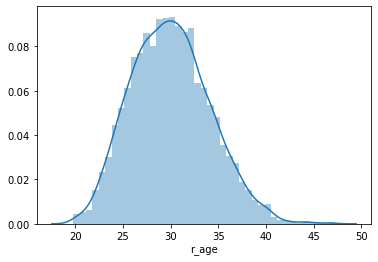

In [122]:
sns.distplot(combined.r_age)

<AxesSubplot:xlabel='b_age'>

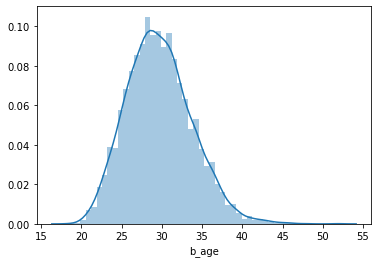

In [123]:
sns.distplot(combined.b_age)

In [124]:
print(combined.r_age.mean())
print(combined.b_age.mean())

29.997536572130983
29.70102822781586


In [125]:
combined.r_age.describe()

count    4948.000000
mean       29.997537
std         4.130975
min        19.789041
25%        26.986301
50%        29.839726
75%        32.699315
max        47.216438
Name: r_age, dtype: float64

In [126]:
combined.b_age.describe()

count    4948.000000
mean       29.701028
std         4.058802
min        18.553425
25%        26.783562
50%        29.439726
75%        32.221918
max        51.926027
Name: b_age, dtype: float64

In [127]:
combined['age_diff'] = combined.r_age - combined.b_age

In [128]:
combined.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_stance,r_dob,b_height,b_weight,b_reach,b_stance,b_dob,r_age,b_age,age_diff
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,Orthodox,1987-02-09,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,32.347945,31.136986,1.210959
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,Orthodox,1989-06-29,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,28.942466,30.117808,-1.175342
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,Orthodox,1984-09-26,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,33.147945,29.564384,3.583562
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,Orthodox,1982-07-19,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,36.567123,30.791781,5.775342
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,Orthodox,1982-07-19,"5' 6""",135 lbs.,"67""",Orthodox,1988-04-26,34.898630,29.123288,5.775342


<AxesSubplot:xlabel='age_diff'>

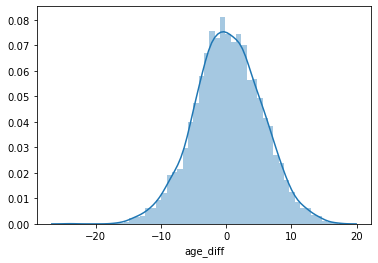

In [129]:
sns.distplot(combined.age_diff)

In [130]:
combined.age_diff.describe()

count    4948.000000
mean        0.296508
std         5.210422
min       -23.895890
25%        -3.104795
50%         0.221918
75%         3.850000
max        17.068493
Name: age_diff, dtype: float64

In [131]:
# Just curious about the fights with the older people.
combined.sort_values('r_age', ascending=False)[['r_fighter', 'b_fighter', 'r_age', 'b_age', 'r_b_winner', 'winner']]

,r_fighter,b_fighter,r_age,b_age,r_b_winner,winner
4824,Randy Couture,James Toney,47.216438,42.038356,r,Randy Couture
3021,Randy Couture,Mark Coleman,46.660274,45.161644,r,Randy Couture
3002,Randy Couture,Brandon Vera,46.430137,32.117808,r,Randy Couture
3058,Dan Henderson,Hector Lombard,45.810959,38.361644,r,Dan Henderson
1952,Mark Hunt,Justin Willis,44.723288,31.391781,b,Justin Willis
...,...,...,...,...,...,...
560,Sage Northcutt,Bryan Barberena,19.928767,26.761644,b,Bryan Barberena
3047,Jake Matthews,Dashon Johnson,19.871233,26.441096,r,Jake Matthews
3629,Vitor Belfort,Tra Telligman,19.868493,32.021918,r,Vitor Belfort
3627,Vitor Belfort,Scott Ferrozzo,19.868493,31.808219,r,Vitor Belfort


In [132]:
combined.sort_values('b_age', ascending=False)[['r_fighter', 'b_fighter', 'r_age', 'b_age', 'r_b_winner', 'winner']]

,r_fighter,b_fighter,r_age,b_age,r_b_winner,winner
5126,Royce Gracie,Ron van Clief,28.030137,51.926027,r,Royce Gracie
3599,Lyoto Machida,Randy Couture,32.939726,47.887671,r,Lyoto Machida
3602,Minotauro Nogueira,Randy Couture,33.263014,46.219178,r,Minotauro Nogueira
2203,Michael Bisping,Dan Henderson,37.635616,46.156164,r,Michael Bisping
3600,Brock Lesnar,Randy Couture,31.367123,45.432877,r,Brock Lesnar
...,...,...,...,...,...,...
3964,Syuri Kondo,Chanmi Jeon,28.638356,20.082192,r,Syuri Kondo
3324,Jessica Andrade,Larissa Pacheco,22.983562,20.030137,r,Jessica Andrade
3965,JJ Aldrich,Chanmi Jeon,24.712329,19.797260,r,JJ Aldrich
4389,Francisco Trevino,Sage Northcutt,33.816438,19.602740,b,Sage Northcutt


In [133]:
get_fights_for_fighter('Randy Couture', combined)[['r_fighter', 'b_fighter', 'r_age', 'b_age', 'r_b_winner', 'winner', 'win_by']]

,r_fighter,b_fighter,r_age,b_age,r_b_winner,winner,win_by
1186,Randy Couture,Vitor Belfort,41.194521,27.408219,r,Randy Couture,TKO - Doctor's Stoppage
1187,Randy Couture,Vitor Belfort,34.345205,20.558904,r,Randy Couture,KO/TKO
1398,Randy Couture,Tim Sylvia,43.726027,31.013699,r,Randy Couture,Decision - Unanimous
2131,Randy Couture,Gabriel Gonzaga,44.205479,28.290411,r,Randy Couture,KO/TKO
3002,Randy Couture,Brandon Vera,46.430137,32.117808,r,Randy Couture,Decision - Unanimous
3017,Randy Couture,Chuck Liddell,39.983562,33.490411,r,Randy Couture,KO/TKO
3021,Randy Couture,Mark Coleman,46.660274,45.161644,r,Randy Couture,Submission
3501,Randy Couture,Tito Ortiz,40.290411,28.693151,r,Randy Couture,Decision - Unanimous
3598,Vitor Belfort,Randy Couture,26.852055,40.638356,r,Vitor Belfort,TKO - Doctor's Stoppage
3599,Lyoto Machida,Randy Couture,32.939726,47.887671,r,Lyoto Machida,KO/TKO


In [134]:
# Now change height to inches and convert height, weight, and reach to a number, not a string with "lbs." or " after it

In [135]:
combined[['r_weight', 'r_height', 'r_reach']].head()

,r_weight,r_height,r_reach
0,135 lbs.,"5' 4""","64"""
1,135 lbs.,"5' 4""","68"""
2,135 lbs.,"5' 3""","66"""
3,135 lbs.,"5' 5""","66"""
4,135 lbs.,"5' 5""","66"""


In [136]:
combined.r_height.value_counts()

6' 1"     597
6' 0"     588
5' 9"     489
5' 10"    487
5' 11"    469
5' 8"     384
6' 2"     381
5' 6"     350
6' 3"     308
5' 7"     300
6' 4"     150
5' 5"     140
5' 4"     114
5' 3"      63
6' 5"      33
6' 6"      29
5' 1"      25
6' 11"     14
6' 8"      10
5' 2"       7
6' 7"       5
6' 10"      3
5' 0"       2
Name: r_height, dtype: int64

In [137]:
combined.b_height.value_counts()

6' 0"     590
5' 10"    587
5' 11"    498
6' 1"     485
5' 9"     478
5' 8"     420
6' 2"     365
6' 3"     324
5' 7"     305
5' 6"     299
6' 4"     166
5' 5"     147
5' 4"      79
5' 3"      74
6' 5"      37
5' 1"      25
6' 6"      23
6' 7"      12
5' 2"       9
6' 11"      7
6' 8"       7
6' 10"      6
5' 0"       3
Name: b_height, dtype: int64

In [138]:
combined.b_reach.value_counts()

74"    458
70"    452
72"    448
71"    430
73"    405
75"    371
76"    328
68"    236
77"    206
69"    199
67"    160
78"    132
66"    132
65"    110
79"     96
64"     90
80"     74
63"     42
62"     26
81"     24
82"     20
84"     12
60"      8
83"      4
61"      3
Name: b_reach, dtype: int64

In [139]:
combined.r_reach.value_counts()

70"    492
74"    479
73"    449
75"    425
71"    421
72"    409
76"    365
68"    275
77"    254
69"    205
66"    158
67"    156
65"    129
79"    121
78"    116
80"     89
64"     72
63"     54
84"     31
81"     22
82"     18
62"     15
60"      9
83"      6
Name: r_reach, dtype: int64

In [140]:
fighters.height.value_counts()

6' 0"     389
5' 9"     327
5' 10"    322
5' 11"    312
6' 1"     261
5' 8"     249
5' 7"     226
6' 2"     218
5' 6"     181
6' 3"     172
5' 5"      99
6' 4"      83
5' 4"      69
5' 3"      37
6' 5"      36
6' 6"      16
5' 2"      11
6' 7"      11
5' 1"      10
6' 8"       9
6' 10"      3
6' 11"      3
5' 0"       2
7' 5"       1
7' 2"       1
4' 11"      1
6' 9"       1
Name: height, dtype: int64

In [141]:
fighters.height.isnull().sum()

263

In [142]:
# So 263 people have not height given.  How many of them are in actual fights?
set(fighters[fighters.height.isnull()].fighter_name).intersection(actual_fighters)

{'Edward Faaloloto',
 'Felix Lee Mitchell',
 'Frank Caracci',
 'Frank Hamaker',
 'Jack Nilson',
 'Noe Hernandez',
 'Ray Wizard',
 'Saeed Hosseini',
 'Sam Fulton',
 'Tom Blackledge'}

In [143]:
#So 10.  How many fights are they in?
combined[combined.r_height.isnull()]

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_stance,r_dob,b_height,b_weight,b_reach,b_stance,b_dob,r_age,b_age,age_diff


In [144]:
combined[combined.b_height.isnull()]

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_stance,r_dob,b_height,b_weight,b_reach,b_stance,b_dob,r_age,b_age,age_diff
3238,Michael Johnson,Edward Faaloloto,1,0,27 of 73,17 of 43,36,39,29 of 75,21 of 47,...,Southpaw,1986-06-04,NaN,155 lbs.,"70""",NaN,1984-07-15,25.076712,26.964384,-1.887671
3239,Terry Etim,Edward Faaloloto,0,0,5 of 6,0 of 3,83,0,5 of 6,0 of 3,...,Orthodox,1986-01-11,NaN,155 lbs.,"70""",NaN,1984-07-15,25.832877,27.326027,-1.493151


In [145]:
# Now I'm confused.  Maybe those fights were already elminated when we dropped the rows with no dob.  So based on this, if we disregard fighters with no height, we will only miss two fights we would not miss already.

In [146]:
combined.r_dob.head()

0   1987-02-09
1   1989-06-29
2   1984-09-26
3   1982-07-19
4   1982-07-19
Name: r_dob, dtype: datetime64[ns]

In [147]:
# reload, with new API featuresabs
import fighters_cleanser, constants
fights = fighters_cleanser.load_cleanse_and_merge(constants.DEFAULT_FIGHTERS_FILE_NAME, constants.DEFAULT_FIGHTS_FILE_NAME)
fights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4393 entries, 0 to 4392
Columns: 136 entries, r_fighter to reach_diff
dtypes: datetime64[ns](3), float64(21), int64(81), object(31)
memory usage: 4.6+ MB


In [148]:
fights.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_weight,b_reach,b_stance,b_dob,r_age,b_age,age_diff,height_diff,weight_diff,reach_diff
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,135,67,Orthodox,1988-04-26,32.347945,31.136986,1.210959,-2,0,-3
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,135,67,Orthodox,1988-04-26,28.942466,30.117808,-1.175342,-2,0,1
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,135,67,Orthodox,1988-04-26,33.147945,29.564384,3.583562,-3,0,-1
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,135,67,Orthodox,1988-04-26,36.567123,30.791781,5.775342,-1,0,-1
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,135,67,Orthodox,1988-04-26,34.898630,29.123288,5.775342,-1,0,-1


<AxesSubplot:xlabel='weight_diff'>

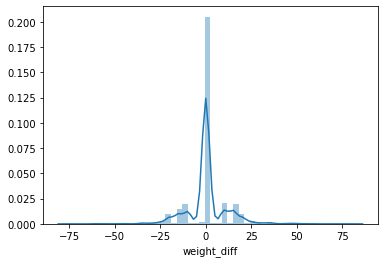

In [149]:
sns.distplot(fights.weight_diff)

<AxesSubplot:xlabel='height_diff'>

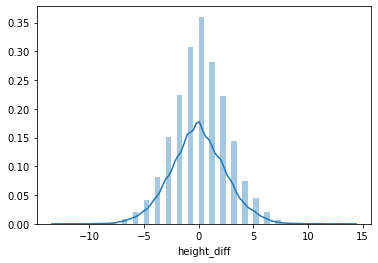

In [150]:
sns.distplot(fights.height_diff)

<AxesSubplot:xlabel='age_diff'>

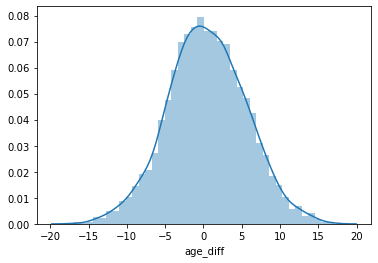

In [151]:
sns.distplot(fights.age_diff)

<AxesSubplot:xlabel='reach_diff'>

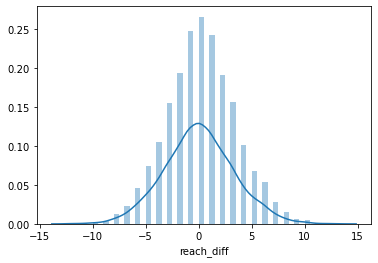

In [152]:
sns.distplot(fights.reach_diff)

In [153]:
fights.r_b_winner.value_counts() / fights.shape[0]

r       0.630776
b       0.353062
None    0.016162
Name: r_b_winner, dtype: float64